In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lies
import cv2 as cv
import math
import random
import scipy
from scipy import optimize
from scipy import linalg

# stuff in this file are not really working:
import slam

In [2]:
img0 = 'k0.jpg'
img1 = 'k1.jpg'
img2 = 'k2.jpg'

trans01 = np.array([0.15, 0, 0, 0, 0, 0])
f = 3000

In [3]:
def se3exp(xi):
    return lies.se3exp(xi)
    
def se3log(M):
    return lies.se3log(M)

def imgval(I, p):
    return slam.imgval(I, p)

def slamResiduals(Ii, Ij, p, xi):
    return slam.slamResiduals(Ii, Ij, p, xi)

def getMatches(px0, px1, lowe=0.4):
    return slam.getMatches(px0, px1, lowe)

In [4]:
px0 = cv.imread(img0, 0)
px1 = cv.imread(img1, 0)
px2 = cv.imread(img2, 0)

In [5]:
w, h = px0.shape

In [6]:
good, pts0, pts1 = getMatches(px0, px1, 0.6)

B = np.linalg.norm(trans01)
pts0 = np.array(pts0)
pts1 = np.array(pts1)
disp = np.linalg.norm(pts1 - pts0, axis=1)
depth = B * f / disp
p = np.array([(pts0[:,0] - w/2) * depth, (pts0[:,1] - h/2) * depth, depth, np.ones(depth.shape)])

187
(3264, 1840)
(56, 1064) (378, 837) 394.1276506666196 1.1417620642420774
(116, 2442) (237, 1616) 834.9244421082523 0.5389709263555793
(120, 2439) (237, 1616) 830.9964266977757 0.5415185740186823
(129, 2431) (237, 1616) 821.9727800747933 0.5474633843216237
(149, 2353) (143, 2784) 430.22428248637357 1.045966065419036
(153, 284) (378, 837) 597.8519492726065 0.7526947107013789
(169, 1348) (300, 1788) 459.6389674570644 0.9790292639669095
(178, 371) (404, 912) 586.2151875280842 0.7676362018144429
(187, 1336) (314, 1776) 457.9866859615387 0.9825613141028965
(187, 1336) (314, 1776) 457.9866859615387 0.9825613141028965
(198, 551) (417, 1068) 561.3750758212572 0.8016030981455272
(246, 1397) (368, 1829) 449.2754945161484 1.001612608505683
(275, 2611) (243, 3051) 440.8290763498474 1.0208038084195572
(283, 2761) (237, 1616) 1146.0192151860767 0.3926635732080063
(283, 2761) (237, 1616) 1146.0192151860767 0.3926635732080063
(284, 2778) (237, 1616) 1162.33449918913 0.38715189157159996
(289, 2824) (

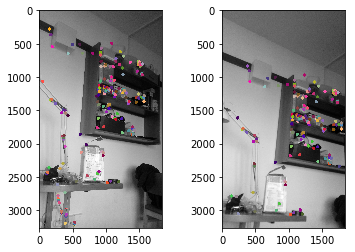

In [7]:
#print (pts0[:15,], pts1[:15,], disp[:15], depth[:15])
nn,two = pts0.shape
print(nn)
print(px0.shape)

px0p = cv.cvtColor(px0, cv.COLOR_GRAY2BGR)
px1p = cv.cvtColor(px1, cv.COLOR_GRAY2BGR)
for i in range(nn):
    colour = (random.randint(60, 256), random.randint(0, 200), random.randint(20, 200))
    j = i#random.randint(0, nn-1)
    print(tuple(pts0[j,:].astype(int).tolist()), tuple(pts1[j,:].astype(int).tolist()), disp[j], depth[j])
    px0p = cv.circle(px0p, tuple(pts0[j,:].astype(int).tolist()), 24, colour, -1)
    px1p = cv.circle(px1p, tuple(pts1[j,:].astype(int).tolist()), 24, colour, -1)
    
plt.subplot(121),plt.imshow(px0p)
plt.subplot(122),plt.imshow(px1p)
plt.show()

In [8]:
xi0 = np.array([.0,.00,0.0,0.0,0.0,0.0])

xi = scipy.optimize.fmin(lambda xi: slamResiduals(px0, px2, p, xi), xi0)
#xi = slam.slamStepIterate(px0, px2, p, xi0, 100)

print(xi)

bad:  56 / 187
bad:  56 / 187
bad:  56 / 187
bad:  56 / 187
bad:  58 / 187
bad:  56 / 187
bad:  56 / 187
bad:  65 / 187
bad:  62 / 187
bad:  78 / 187
bad:  56 / 187
bad:  69 / 187
bad:  56 / 187
bad:  57 / 187
bad:  59 / 187
bad:  59 / 187
bad:  61 / 187
bad:  57 / 187
bad:  56 / 187
bad:  61 / 187
bad:  61 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  59 / 187
bad:  57 / 187
bad:  59 / 187
bad:  57 / 187
bad:  59 / 187
bad:  57 / 187
bad:  59 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  59 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  59 / 187
bad:  59 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 / 187
bad:  57 /

In [9]:
pts0 = np.int32(pts0)
pts1 = np.int32(pts1)
F, mask = cv.findFundamentalMat(pts1,pts0,cv.FM_LMEDS)
# We select only inlier points
pts0 = pts0[mask.ravel()==1]
pts1 = pts1[mask.ravel()==1]

136
(3264, 1840)


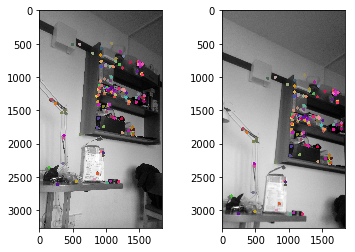

In [10]:
nn,two = pts0.shape
print(nn)
print(px0.shape)

px0p = cv.cvtColor(px0, cv.COLOR_GRAY2BGR)
px1p = cv.cvtColor(px1, cv.COLOR_GRAY2BGR)
for i in range(nn):
    colour = (random.randint(60, 256), random.randint(0, 200), random.randint(20, 200))
    j = i#random.randint(0, nn-1)
    px0p = cv.circle(px0p, tuple(pts0[j,:].astype(int).tolist()), 24, colour, -1)
    px1p = cv.circle(px1p, tuple(pts1[j,:].astype(int).tolist()), 24, colour, -1)
    
plt.subplot(121),plt.imshow(px0p)
plt.subplot(122),plt.imshow(px1p)
plt.show()

In [11]:
lowe = 0.8

sift = cv.xfeatures2d.SIFT_create()
kp0, des0 = sift.detectAndCompute(px0, None)
kp1, des1 = sift.detectAndCompute(px1, None)
kp2, des2 = sift.detectAndCompute(px2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params, search_params)
matches01 = flann.knnMatch(des1, des0, k=2)
matches02 = flann.knnMatch(des2, des0, k=2)

good01 = {}

# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches01):
    if m.distance < lowe * n.distance:
        good01[m.trainIdx] = m
        
pts0 = []
pts1 = []
pts2 = []
        
for i, (m, n) in enumerate(matches02):
    if m.distance < lowe * n.distance:
        if m.trainIdx in good01:
            pts0.append(kp0[m.trainIdx].pt)
            pts1.append(kp1[good01[m.trainIdx].queryIdx].pt)
            pts2.append(kp2[m.queryIdx].pt)
        
pts0 = np.int32(pts0)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

print(pts0.shape)

(46, 2)


In [12]:
# we should already know this matrix?
F01, mask = cv.findFundamentalMat(pts1,pts0,cv.FM_LMEDS)
# We select only inlier points
pts0 = pts0[mask.ravel()==1]
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]


F02, mask = cv.findFundamentalMat(pts2,pts0,cv.FM_LMEDS)
pts0 = pts0[mask.ravel()==1]
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]


24
(3264, 1840)


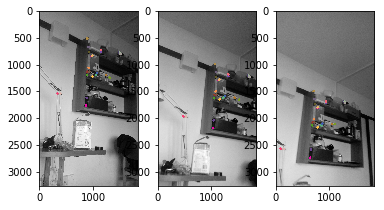

In [13]:
nn,two = pts0.shape
print(nn)
print(px0.shape)

px0p = cv.cvtColor(px0, cv.COLOR_GRAY2BGR)
px1p = cv.cvtColor(px1, cv.COLOR_GRAY2BGR)
px2p = cv.cvtColor(px2, cv.COLOR_GRAY2BGR)
for i in range(nn):
    colour = (random.randint(60, 256), random.randint(0, 200), random.randint(20, 200))
    j = i#random.randint(0, nn-1)
    px0p = cv.circle(px0p, tuple(pts0[j,:].astype(int).tolist()), 24, colour, -1)
    px1p = cv.circle(px1p, tuple(pts1[j,:].astype(int).tolist()), 24, colour, -1)
    px2p = cv.circle(px2p, tuple(pts2[j,:].astype(int).tolist()), 24, colour, -1)
    
plt.subplot(131),plt.imshow(px0p)
plt.subplot(132),plt.imshow(px1p)
plt.subplot(133),plt.imshow(px2p)
plt.show()

In [14]:
# TODO calibrate camera
K0 = np.array([[3000, 0, 920], [0, 3000, 1632], [0, 0, 1]])
K1 = np.array([[3000, 0, 920], [0, 3000, 1632], [0, 0, 1]])

# calculate essential matrix
E = K0.transpose() @ F02 @ K0
print(E)

[[ 1.10669896  7.31912421  1.17305861]
 [-6.03640527 -0.07748482 -0.32176681]
 [-3.21781377 -0.17365586 -0.19170825]]


In [45]:
# get null space of essential matrix
U,s,Vt = scipy.linalg.svd(E)
nullmask = (s <= 1e-7)
t = scipy.compress(nullmask, Vt, axis=0)[0]

# finding rotation matrix
W = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])
Wt = W.transpose()

Ra = U @ Wt @ Vt
Rb = U @ W @ Vt
rota = lies.so3log(Ra)

print(t)
print (np.linalg.det(Ra))
print (rota)

[-0.05069454 -0.15057202  0.9872984 ]
0.9999999999999999
[0.06908452 0.97110528 2.92738872]


In [46]:
disp = np.linalg.norm(pts1 - pts0, axis=1)
depth = B * f / disp
p = np.array([(pts0[:,0] - w/2) * depth, (pts0[:,1] - h/2) * depth, depth, np.ones(depth.shape)])

# doesn't work, probably slamResiduals is bad. I should probably commit at this point
s = scipy.optimize.fmin(lambda l: slamResiduals(px0, px2, p, np.concatenate([t * l[0], rota])), [0.0])

print(s)

bad:  0 / 24
bad:  0 / 24
bad:  0 / 24
bad:  0 / 24
bad:  0 / 24
bad:  0 / 24
bad:  0 / 24
bad:  0 / 24
Optimization terminated successfully.
         Current function value: 3120.500000
         Iterations: 3
         Function evaluations: 8
[0.]
